<a href="https://colab.research.google.com/github/rahulevol/Projects/blob/main/InternshipDay8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

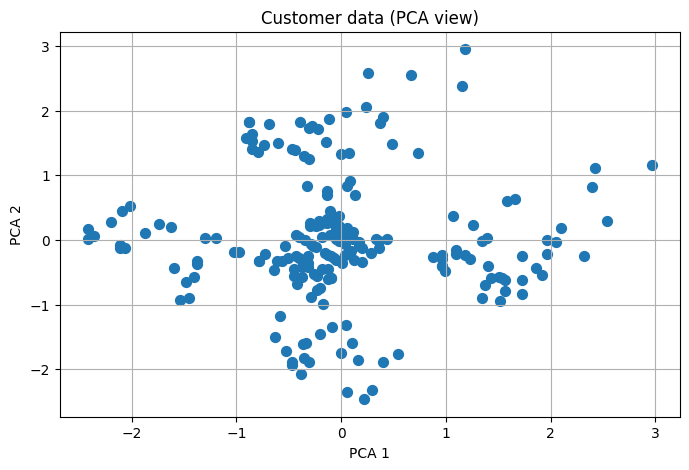

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('/content/Mall_Customers.csv')

# Select relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: PCA for 2D visualization (though we already have 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of the data
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=50)
plt.title('Customer data (PCA view)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


In [2]:
from sklearn.cluster import KMeans

# Choose number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# View data with clusters
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


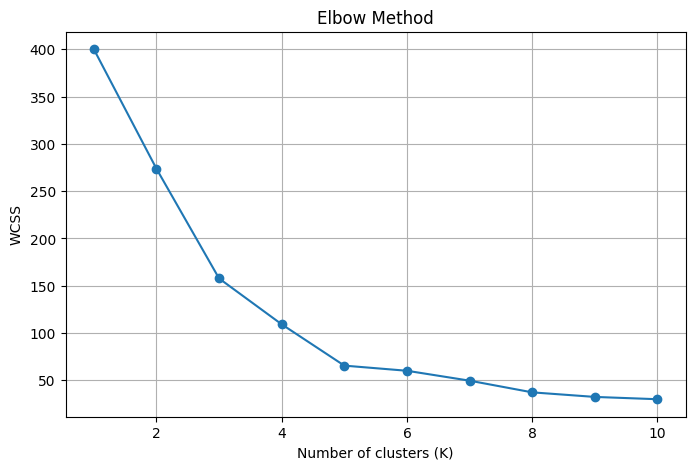

In [3]:
wcss = []  # Within-cluster sum of squares

# Try different cluster counts
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


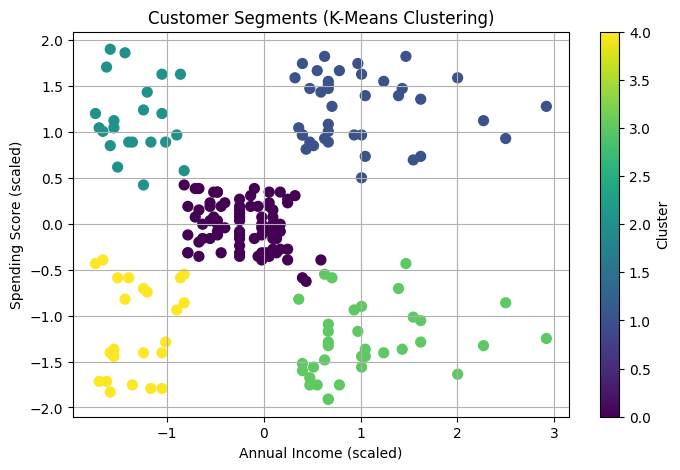

In [4]:
# Plot clusters using original data
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [5]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
score = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score: {score:.3f}')


Silhouette Score: 0.555
